In [1]:
import os
import pandas as pd
import numpy as np
from math import sqrt
from tqdm import tqdm_notebook as tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
ratings_df = pd.read_csv('ratings.csv', encoding='utf-8')

print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [3]:
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=1234)

print(train_df.shape)
print(test_df.shape)

(80668, 4)
(20168, 4)


# Sprase matrix 만들기!!

협업 필터링에서 만들었던 두번째 방법대로 unstack을 이용해 만듬

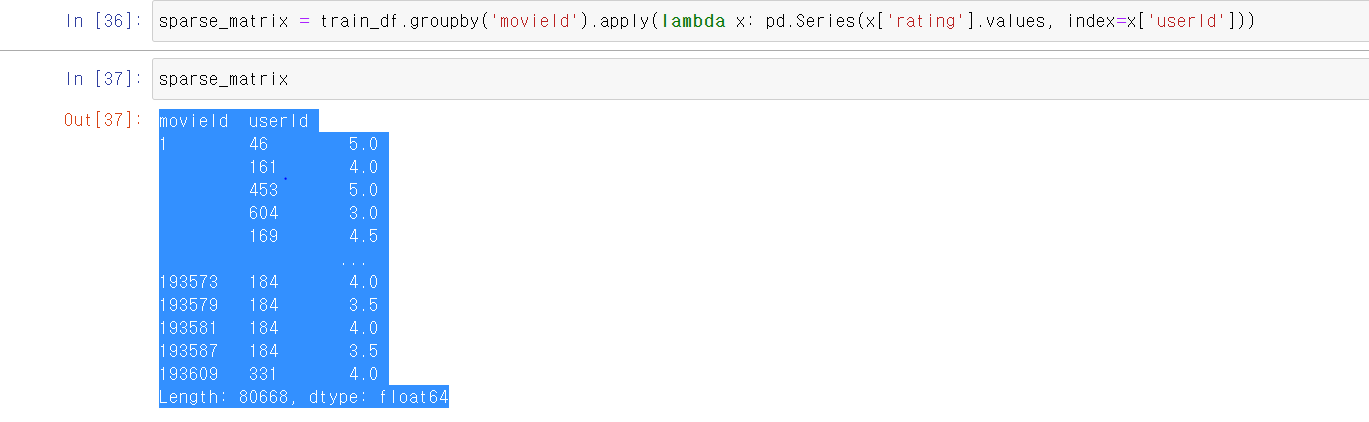

In [4]:
sparse_matrix = train_df.groupby('movieId').apply(lambda x: pd.Series(x['rating'].values, index=x['userId'])).unstack()
sparse_matrix.index.name = 'movieId'

sparse_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,NaN,2.5,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,NaN,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 결측값을 채우는 baseline 기준 1. movie, 2. user 비교 가보자가보자

In [5]:
# fill sparse matrix with average of movie ratings
sparse_matrix_withmovie = sparse_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)

# fill sparse matrix with average of user ratings
sparse_matrix_withuser = sparse_matrix.apply(lambda x: x.fillna(x.mean()), axis=0)

In [6]:
sparse_matrix_withmovie.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,3.893491,3.893491,3.893491,3.893491,4.000000,3.893491,4.500000,3.893491,3.893491,3.893491,...,4.000000,3.893491,4.000000,3.000000,4.000000,2.500000,3.893491,2.500000,3.893491,5.000000
2,3.396341,3.396341,3.396341,3.396341,3.396341,3.396341,3.396341,4.000000,3.396341,3.396341,...,3.396341,4.000000,3.396341,3.396341,3.500000,3.396341,3.396341,2.000000,3.396341,3.396341
3,4.000000,3.454545,3.454545,3.454545,3.454545,5.000000,3.454545,3.454545,3.454545,3.454545,...,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545
4,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,...,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000
5,3.039474,3.039474,3.039474,3.039474,3.039474,5.000000,3.039474,3.039474,3.039474,3.039474,...,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474


In [7]:
sparse_matrix_withuser.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.320652,3.94,2.516667,3.631868,4.000000,3.504132,4.500000,3.486486,3.1,3.292035,...,4.000000,3.473684,4.000000,3.000000,4.000000,2.500000,3.772414,2.500000,3.275862,5.000000
2,4.320652,3.94,2.516667,3.631868,3.636364,3.504132,3.247967,4.000000,3.1,3.292035,...,4.396104,4.000000,3.494024,3.486842,3.500000,3.649718,3.772414,2.000000,3.275862,3.678709
3,4.000000,3.94,2.516667,3.631868,3.636364,5.000000,3.247967,3.486486,3.1,3.292035,...,4.396104,3.473684,3.494024,3.486842,3.255618,3.649718,3.772414,3.145865,3.275862,3.678709
4,4.320652,3.94,2.516667,3.631868,3.636364,3.504132,3.247967,3.486486,3.1,3.292035,...,4.396104,3.473684,3.494024,3.486842,3.255618,3.649718,3.772414,3.145865,3.275862,3.678709
5,4.320652,3.94,2.516667,3.631868,3.636364,5.000000,3.247967,3.486486,3.1,3.292035,...,4.396104,3.473684,3.494024,3.486842,3.255618,3.649718,3.772414,3.145865,3.275862,3.678709


# SVD factorization

numpy의 선형대수(linalg) 함수 중 svd 분해 이용 : np.linalg.svd()
S matrix에 대각이 float 형인 I matrix product
T는 : ,k, Dt 는 k , :
Item_factors는 S랑 D^T product 한 걸로 치네요 여기서는..
suer_factors는 T 그대로 사용
###### s는 array 형으로 반환되고, 내림차순임

In [8]:
def get_svd(s_matrix, k=300):
  u, s, vh = np.linalg.svd(s_matrix.transpose())
  S = s[:k] * np.identity(k, np.float)
  T = u[:,:k]
  Dt = vh[:k,:]

  item_factors = np.transpose(np.matmul(S, Dt))
  user_factors = np.transpose(T)

  return item_factors, user_factors

---------------------------------------------------------------------------

In [9]:
item_factors, user_factors = get_svd(sparse_matrix_withmovie)
prediction_result_df = pd.DataFrame(np.matmul(item_factors, user_factors),
                                    columns=sparse_matrix_withmovie.columns.values, index=sparse_matrix_withmovie.index.values)

movie_prediction_result_df = prediction_result_df.transpose()

In [10]:
print(item_factors.shape)
print(user_factors.shape)

(8938, 300)
(300, 610)


8938 X 610 = (8938 X 300) (300 X 300) (300 X 610)

In [11]:
movie_prediction_result_df.head()

,1,2,3,4,5,6,7,8,9,10,...,190219,191005,193565,193567,193571,193573,193579,193581,193587,193609
1,3.908820,3.390957,4.035030,2.252912,3.053903,3.981066,3.183727,2.744891,2.909088,3.505548,...,0.999983,4.499925,3.499942,2.999950,3.999934,3.999934,3.499942,3.999934,3.499942,3.999934
2,3.911434,3.445683,3.461056,2.240729,2.998555,3.959505,3.151831,2.751379,2.910568,3.406105,...,0.999942,4.499739,3.499797,2.999826,3.999768,3.999768,3.499797,3.999768,3.499797,3.999768
3,3.896327,3.383747,3.439498,2.240612,3.049043,3.935766,3.174809,2.738581,2.910505,3.515399,...,1.000001,4.500004,3.500003,3.000003,4.000004,4.000004,3.500003,4.000004,3.500003,4.000004
4,3.881024,3.421886,3.427186,2.239842,3.057280,3.946683,3.197075,2.748549,2.921073,3.513596,...,0.999981,4.499913,3.499933,2.999942,3.999923,3.999923,3.499933,3.999923,3.499933,3.999923
5,4.018416,3.400912,3.493598,2.184629,3.156865,3.946429,3.246271,2.874286,2.903455,3.256205,...,1.000034,4.500155,3.500120,3.000103,4.000138,4.000138,3.500120,4.000138,3.500120,4.000138


## baseline이 user rating

In [12]:
item_factors, user_factors = get_svd(sparse_matrix_withuser)
prediction_result_df = pd.DataFrame(np.matmul(item_factors, user_factors),
                                    columns=sparse_matrix_withuser.columns.values, index=sparse_matrix_withuser.index.values)

user_prediction_result_df = prediction_result_df.transpose()

In [13]:
user_prediction_result_df.head()

,1,2,3,4,5,6,7,8,9,10,...,190219,191005,193565,193567,193571,193573,193579,193581,193587,193609
1,4.362666,4.366280,3.966290,4.335373,4.363704,3.983660,4.303573,4.339269,4.305649,4.254211,...,4.318208,4.320182,4.320834,4.321160,4.320508,4.320508,4.320834,4.320508,4.320834,4.321664
2,4.018066,3.941879,3.903070,3.960808,3.907779,3.993262,3.913604,3.941605,3.919774,3.880579,...,3.924886,3.945287,3.937965,3.934304,3.941626,3.941626,3.937965,3.941626,3.937965,3.940416
3,2.503743,2.498854,2.491555,2.529266,2.509395,2.519116,2.486491,2.511599,2.508844,2.517707,...,2.526417,2.516350,2.516789,2.517009,2.516569,2.516569,2.516789,2.516569,2.516789,2.516032
4,3.624253,3.635961,3.619964,3.641844,3.632798,3.643807,3.636671,3.642801,3.615370,3.632327,...,3.631674,3.632685,3.631554,3.630989,3.632119,3.632119,3.631554,3.632119,3.631554,3.632004
5,4.051183,3.581114,3.721059,3.627674,3.519383,3.536805,3.768194,3.682646,3.571370,3.639438,...,3.586132,3.638168,3.635671,3.634422,3.636919,3.636919,3.635671,3.636919,3.635671,3.637667


In [14]:
item_factors.shape

(8938, 300)

# baseline이 다른 두 case 비교!!

완전 개떡 코드임 : 맨 마지막만 return 해줌 ㅡㅡ

In [33]:
def evaluate(test_df, prediction_result_df):
  groups_with_movie_ids = test_df.groupby(by='movieId')
  groups_with_user_ids = test_df.groupby(by='userId')
  intersection_movie_ids = sorted(list(set(list(prediction_result_df.columns)).intersection(set(list(groups_with_movie_ids.indices.keys())))))
  intersection_user_ids = sorted(list(set(list(prediction_result_df.index)).intersection(set(groups_with_user_ids.indices.keys()))))
    #matrix에서 겹치는 애들만 보려고 그러는듯
  print(len(intersection_movie_ids))
  print(len(intersection_user_ids))

  compressed_prediction_df = prediction_result_df.loc[intersection_user_ids][intersection_movie_ids]

  # test_df에 대해서 RMSE 계산
  grouped = test_df.groupby(by='userId')
  rmse_df = pd.DataFrame(columns=['rmse'])
  for userId, group in tqdm(grouped):
      if userId in intersection_user_ids:
          pred_ratings = compressed_prediction_df.loc[userId][compressed_prediction_df.loc[userId].index.intersection(list(group['movieId'].values))]
          pred_ratings = pred_ratings.to_frame(name='rating').reset_index().rename(columns={'index':'movieId','rating':'pred_rating'})
          actual_ratings = group[['rating', 'movieId']].rename(columns={'rating':'actual_rating'})

          final_df = pd.merge(actual_ratings, pred_ratings, how='inner', on=['movieId'])
          final_df = final_df.round(4) # 반올림
          if not final_df.empty:
            rmse = sqrt(mean_squared_error(final_df['actual_rating'], final_df['pred_rating']))
            rmse_df.loc[userId] = rmse
            print(rmse)

  return final_df, rmse_df

In [34]:
result_df, _ = evaluate(test_df, user_prediction_result_df)
print(result_df)
print("For user matrix")
print(f"RMSE: {sqrt(mean_squared_error(result_df['actual_rating'].values, result_df['pred_rating'].values))}")

4385
610


<ipython-input-33-8ee30ed1f7b5>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):


0.6635132559590149
0.7026584251967667
1.8115235777811844
1.324149384939767
0.6577397640957457
0.7929253759534916
1.2002846215621612
0.89663332137502
1.2471079313756288
1.0683903285195324
0.6191081698701771
0.7007124312084095
0.9051704922278454
1.0946782969210633
0.9726596463780678
0.7249510597901826
0.4485601836245982
0.5850275097455597
0.8731608530849285
1.376066868106343
0.8837241965822821
1.5701179583405342
0.6644215407028884
0.5331600677983459
0.20337647356565108
0.22891183892494502
0.8987062868368063
0.7839920499437478
0.5752105689803229
0.4537244731111602
0.9086716011574258
0.7727174328644537
1.2045016711131147
1.4514323106848628
0.4637706787842456
0.9326807918434281
1.0252734480777963
1.0176372153588593
0.9980597062411759
1.2530423379073172
1.08083050855452
1.0595379892659225
0.4648188605875354
1.2607801323871748
0.8772488913219448
0.9590415488913919
1.0129128718119604
0.7509560528641698
0.30742649853257603
0.7986898251981178
1.3357963714324887
0.6927101220671499
0.0083502494972

0.8527285181781397
0.49080270432367074
0.9656995165878608
0.5672225279817437
0.5769522142257536
0.6713439222931864
1.1617368742533742
0.9956969804730136
0.8118082378246726
0.4897598097537199
2.2591533569016513
1.1011475902937606
0.47543421907417077
1.1059266071564906
0.7755217681019664
0.6068599224839629
1.4437000000000002
1.1136530036326395
1.06137396419688
0.5688198453188595
0.3752
0.6919965642978294
1.294240042319375
0.8360117739013578
0.4960582624486662
0.8477735005187518
0.872388334306078
1.5454054315939232
1.2011540024770624
1.0489680960864076
0.7997631542257638
1.2679340032115236
1.0147865607532207
0.8649111885471675
1.0313047985440578
1.029891404656149
0.9589289383937106
1.060221411267048
1.094510239281995
0.6634363669561686
0.8360532828822467
0.8063840375016732
0.9429416942473166
0.8839286651082203
0.9879418602482481
1.1214161989422127
1.343376079882324
1.1732069240618497
0.6254648391396594
0.9898766434931846
0.7785857398422568
1.3779257188494114
1.2351914662647783
0.746771776

In [17]:
result_df, _ = evaluate(test_df, movie_prediction_result_df)
print(result_df)
print("For movie matrix")
print(f"RMSE: {sqrt(mean_squared_error(result_df['actual_rating'].values, result_df['pred_rating'].values))}")

4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



     actual_rating  movieId  pred_rating
0              5.0     3527       3.6030
1              3.5    84772       3.0433
2              3.5   103141       4.0453
3              4.0    81132       3.5000
4              4.5   130634       3.2496
..             ...      ...          ...
218            4.0   106100       3.8314
219            4.0   111759       3.9239
220            1.0     4852       1.0000
221            3.0     2628       3.1901
222            5.0     1953       3.8234

[223 rows x 3 columns]
For movie matrix
RMSE: 0.8209361471321392


In [18]:
def find_best_k(sparse_matrix, maximum_k=100):
    print("\nFind best optimized k for Matrix Factorization")
    k_candidates = np.arange(50, maximum_k, 10)
    final_df = pd.DataFrame(columns=['rmse'], index=k_candidates)
    for k in tqdm(k_candidates):
        item_factors, user_factors = get_svd(sparse_matrix, k)
        each_results_df = pd.DataFrame(np.matmul(item_factors, user_factors),
                                    columns=sparse_matrix.columns.values, index=sparse_matrix.index.values)
        each_results_df = each_results_df.transpose()
        
        result_df, _ = evaluate(test_df, each_results_df)
        each_rmse = sqrt(mean_squared_error(result_df['actual_rating'].values, result_df['pred_rating'].values))

        final_df.loc[k]['rmse'] = each_rmse

    return final_df


In [19]:
res = find_best_k(sparse_matrix_withmovie, 200)


Find best optimized k for Matrix Factorization


<ipython-input-18-eee70a464fbe>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(k_candidates):


4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):



4385
610


<ipython-input-15-9ea648c35522>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId, group in tqdm(grouped):


In [20]:
res

,rmse
50,0.823432
60,0.826151
70,0.825998
80,0.821733
90,0.823385
100,0.824104
110,0.823003
120,0.82306
130,0.822952
140,0.821839


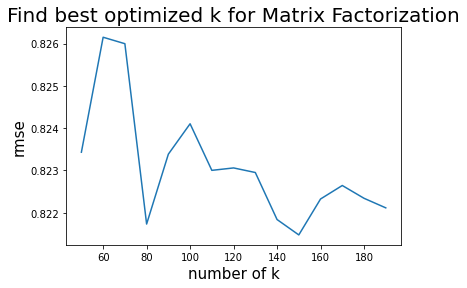

In [21]:
plt.plot(res.index, res.rmse)
plt.title("Find best optimized k for Matrix Factorization", fontsize=20)
plt.xlabel('number of k', fontsize=15)
plt.ylabel('rmse', fontsize=15)
plt.show()

# 위의 스파게티 코드들 말고 자동으로

In [24]:
from matrix_factorization import BaselineModel, KernelMF, train_update_test_split

In [25]:
ratings_df = pd.read_csv('ratings.csv', encoding='utf-8')

print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [26]:
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=1234)

print(train_df.shape)
print(test_df.shape)

(80668, 4)
(20168, 4)


In [27]:
new_train_df = train_df
new_train_df = new_train_df.rename(columns={"userId": "user_id", "movieId": "item_id"})
new_train_df.head()

,user_id,item_id,rating,timestamp
95713,600,5943,3.0,1237714356
61560,407,2571,5.0,1424349171
77204,482,8958,4.0,1105397126
93367,599,2322,2.5,1498515283
90892,590,2959,3.5,1258416553


dataset -> train valid test -> train valid : 실제 학습할때 , test :  학습된 모델의 성능을 평가할 때 사용

In [28]:
(
    X_train_initial,
    y_train_initial,
    X_train_update,
    y_train_update,
    X_test_update,
    y_test_update,
) = train_update_test_split(new_train_df, frac_new_users=0.2)

In [29]:
# Initial training
matrix_fact = KernelMF(n_epochs=20, n_factors=100, verbose=1, lr=0.001, reg=0.005)
matrix_fact.fit(X_train_initial, y_train_initial)

Epoch  1 / 20  -  train_rmse: 0.9998664326688633
Epoch  2 / 20  -  train_rmse: 0.973090011872506
Epoch  3 / 20  -  train_rmse: 0.9553608250128993
Epoch  4 / 20  -  train_rmse: 0.9420247240035524
Epoch  5 / 20  -  train_rmse: 0.9313788704008242
Epoch  6 / 20  -  train_rmse: 0.9224939095769815
Epoch  7 / 20  -  train_rmse: 0.914868567890445
Epoch  8 / 20  -  train_rmse: 0.9081365909989129
Epoch  9 / 20  -  train_rmse: 0.9020948934830288
Epoch  10 / 20  -  train_rmse: 0.8965890735514888
Epoch  11 / 20  -  train_rmse: 0.8914989828529044
Epoch  12 / 20  -  train_rmse: 0.886752052987864
Epoch  13 / 20  -  train_rmse: 0.8822830253344094
Epoch  14 / 20  -  train_rmse: 0.8780537509764551
Epoch  15 / 20  -  train_rmse: 0.8740077878341037
Epoch  16 / 20  -  train_rmse: 0.8701419675247849
Epoch  17 / 20  -  train_rmse: 0.8664115078645932
Epoch  18 / 20  -  train_rmse: 0.8628056863088956
Epoch  19 / 20  -  train_rmse: 0.8593102042750426
Epoch  20 / 20  -  train_rmse: 0.8558960135482226


KernelMF(gamma=0.01, lr=0.001, n_epochs=20, reg=0.005)

In [30]:
# Update model with new users
matrix_fact.update_users(
    X_train_update, y_train_update, lr=0.001, n_epochs=20, verbose=1
)

Epoch  1 / 20  -  train_rmse: 0.906693009916619
Epoch  2 / 20  -  train_rmse: 0.8960532070138535
Epoch  3 / 20  -  train_rmse: 0.8885272767319087
Epoch  4 / 20  -  train_rmse: 0.88285740140442
Epoch  5 / 20  -  train_rmse: 0.878389010223104
Epoch  6 / 20  -  train_rmse: 0.8747366128917684
Epoch  7 / 20  -  train_rmse: 0.8715890774792041
Epoch  8 / 20  -  train_rmse: 0.8688533168745806
Epoch  9 / 20  -  train_rmse: 0.8664004809281907
Epoch  10 / 20  -  train_rmse: 0.8641789458667923
Epoch  11 / 20  -  train_rmse: 0.8621311293168046
Epoch  12 / 20  -  train_rmse: 0.8602456322681349
Epoch  13 / 20  -  train_rmse: 0.8584687529386558
Epoch  14 / 20  -  train_rmse: 0.856795269498776
Epoch  15 / 20  -  train_rmse: 0.855212302710604
Epoch  16 / 20  -  train_rmse: 0.8537092034666413
Epoch  17 / 20  -  train_rmse: 0.8522621656808534
Epoch  18 / 20  -  train_rmse: 0.8508804128550186
Epoch  19 / 20  -  train_rmse: 0.8495582232221792
Epoch  20 / 20  -  train_rmse: 0.8482774731265889


In [31]:
pred = matrix_fact.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared=False)
print(f"\nTest RMSE: {rmse:.4f}")


Test RMSE: 0.8861


In [32]:
# Get recommendations
user = 200
items_known = X_train_initial.query("user_id == @user")["item_id"]
matrix_fact.recommend(user=user, items_known=items_known)

,user_id,item_id,rating_pred
405,200,527,4.561114
591,200,260,4.537719
51,200,1196,4.517191
381,200,1204,4.459052
1045,200,1221,4.418151
318,200,912,4.386122
650,200,858,4.358978
94,200,1136,4.354379
27,200,50,4.348471
607,200,2028,4.346004


## sgd

In [35]:
baseline_model = BaselineModel(method='sgd', n_epochs = 20, reg = 0.005, lr = 0.01, verbose=1)
baseline_model.fit(X_train_initial, y_train_initial)

pred = baseline_model.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared = False)

print(f'\nTest RMSE: {rmse:.4f}')

Epoch  1 / 20  -  train_rmse: 0.909285061508855
Epoch  2 / 20  -  train_rmse: 0.8849633480709524
Epoch  3 / 20  -  train_rmse: 0.871143706384035
Epoch  4 / 20  -  train_rmse: 0.8613832268470054
Epoch  5 / 20  -  train_rmse: 0.8547201876221903
Epoch  6 / 20  -  train_rmse: 0.848593383898629
Epoch  7 / 20  -  train_rmse: 0.8435002765912112
Epoch  8 / 20  -  train_rmse: 0.8396960728700231
Epoch  9 / 20  -  train_rmse: 0.8358584563454853
Epoch  10 / 20  -  train_rmse: 0.8327066908800271
Epoch  11 / 20  -  train_rmse: 0.8299761475819165
Epoch  12 / 20  -  train_rmse: 0.8274709644930583
Epoch  13 / 20  -  train_rmse: 0.8253491997277539
Epoch  14 / 20  -  train_rmse: 0.8229607559852232
Epoch  15 / 20  -  train_rmse: 0.8210710171894325
Epoch  16 / 20  -  train_rmse: 0.8193322610670295
Epoch  17 / 20  -  train_rmse: 0.8178959913345751
Epoch  18 / 20  -  train_rmse: 0.8162705647926919
Epoch  19 / 20  -  train_rmse: 0.8147601835957708
Epoch  20 / 20  -  train_rmse: 0.8132283767740226

Test RMSE: 

In [36]:
%%time
baseline_model.update_users(X_train_update, y_train_update, n_epochs=20, lr=0.001, verbose=1)
pred = baseline_model.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared = False)

print(f'\nTest RMSE: {rmse:.4f}')

Epoch  1 / 20  -  train_rmse: 0.8708126336033334
Epoch  2 / 20  -  train_rmse: 0.8605627930961463
Epoch  3 / 20  -  train_rmse: 0.853624445562188
Epoch  4 / 20  -  train_rmse: 0.8486062277180721
Epoch  5 / 20  -  train_rmse: 0.8448324250195828
Epoch  6 / 20  -  train_rmse: 0.8418703702009911
Epoch  7 / 20  -  train_rmse: 0.8394909994804378
Epoch  8 / 20  -  train_rmse: 0.8375203459285746
Epoch  9 / 20  -  train_rmse: 0.8358834905781098
Epoch  10 / 20  -  train_rmse: 0.8344598068807643
Epoch  11 / 20  -  train_rmse: 0.8332288555217106
Epoch  12 / 20  -  train_rmse: 0.8321492931363323
Epoch  13 / 20  -  train_rmse: 0.8311966729720067
Epoch  14 / 20  -  train_rmse: 0.8303466465381373
Epoch  15 / 20  -  train_rmse: 0.829587691591783
Epoch  16 / 20  -  train_rmse: 0.8289068062569429
Epoch  17 / 20  -  train_rmse: 0.8282892925414
Epoch  18 / 20  -  train_rmse: 0.8277254274790438
Epoch  19 / 20  -  train_rmse: 0.8272134233811573
Epoch  20 / 20  -  train_rmse: 0.826745207608589

Test RMSE: 0.8

## als

In [37]:
baseline_model = BaselineModel(method='als', n_epochs = 20, reg = 0.5, verbose=1)
baseline_model.fit(X_train_initial, y_train_initial)

pred = baseline_model.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared = False)

print(f'\nTest RMSE: {rmse:.4f}')

Epoch  1 / 20  -  train_rmse: 0.7996344708047076
Epoch  2 / 20  -  train_rmse: 0.7831977172818491
Epoch  3 / 20  -  train_rmse: 0.7816674946050962
Epoch  4 / 20  -  train_rmse: 0.7814215351591309
Epoch  5 / 20  -  train_rmse: 0.7813577620345659
Epoch  6 / 20  -  train_rmse: 0.7813321996619694
Epoch  7 / 20  -  train_rmse: 0.7813169695431811
Epoch  8 / 20  -  train_rmse: 0.7813053113531281
Epoch  9 / 20  -  train_rmse: 0.7812953665136178
Epoch  10 / 20  -  train_rmse: 0.7812865491134837
Epoch  11 / 20  -  train_rmse: 0.7812786268464176
Epoch  12 / 20  -  train_rmse: 0.7812714741604925
Epoch  13 / 20  -  train_rmse: 0.7812650028687148
Epoch  14 / 20  -  train_rmse: 0.7812591414431262
Epoch  15 / 20  -  train_rmse: 0.7812538281911598
Epoch  16 / 20  -  train_rmse: 0.7812490086005428
Epoch  17 / 20  -  train_rmse: 0.7812446340355242
Epoch  18 / 20  -  train_rmse: 0.7812406609241875
Epoch  19 / 20  -  train_rmse: 0.7812370501560634
Epoch  20 / 20  -  train_rmse: 0.7812337665898192

Test RMS